In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [16]:
cryptos = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'ADA-USD', 'SOL-USD']
print("Fetching live crypto data...")
crypto_data = {}

for symbol in cryptos:
    print(f"Fetching {symbol}...")
    ticker = yf.Ticker(symbol)
    data = ticker.history(period='30d') # Last 30 days
    crypto_data[symbol] = data['Close']

print(f"✅ Successfully fetched data for {len(cryptos)} cryptocurrencies")
print(f"Date range: {crypto_data['BTC-USD'].index[0].date()} to {crypto_data['BTC-USD'].index[-1].date()}")

# Create combined dataframe
df = pd.DataFrame(crypto_data)
print(f"\nData shape: {df.shape}")
print("Latest prices:")
for symbol in cryptos:
    latest_price = df[symbol].iloc[-1]
    print(f"{symbol}: ${latest_price:.2f}")


Fetching live crypto data...
Fetching BTC-USD...
Fetching ETH-USD...
Fetching BNB-USD...
Fetching ADA-USD...
Fetching SOL-USD...
✅ Successfully fetched data for 5 cryptocurrencies
Date range: 2025-09-22 to 2025-10-21

Data shape: (30, 5)
Latest prices:
BTC-USD: $110173.97
ETH-USD: $3937.69
BNB-USD: $1088.17
ADA-USD: $0.66
SOL-USD: $189.15


In [17]:
print("Data Quality Check:")
print(f"Missing values:")
print(df.isnull().sum())
print(f"\nData statistics:")
print(df.describe().round(2))

# Show data sample
print(f"\n🗓️ Recent 5 days:")
print(df.tail())

Data Quality Check:
Missing values:
BTC-USD    0
ETH-USD    0
BNB-USD    0
ADA-USD    0
SOL-USD    0
dtype: int64

Data statistics:
         BTC-USD  ETH-USD  BNB-USD  ADA-USD  SOL-USD
count      30.00    30.00    30.00    30.00    30.00
mean   114518.71  4166.03  1116.01     0.76   207.31
std      5551.19   251.96   109.64     0.09    17.18
min    106467.79  3750.61   945.71     0.62   178.05
25%    110277.71  3981.73  1020.68     0.66   190.41
50%    113166.52  4149.71  1103.98     0.80   208.56
75%    120173.18  4364.64  1183.82     0.82   220.87
max    124752.53  4687.77  1310.21     0.87   234.86

🗓️ Recent 5 days:
                                 BTC-USD      ETH-USD      BNB-USD   ADA-USD  \
Date                                                                           
2025-10-17 00:00:00+00:00  106467.789062  3832.558838  1071.963013  0.624843   
2025-10-18 00:00:00+00:00  107198.265625  3890.346191  1093.152466  0.634461   
2025-10-19 00:00:00+00:00  108666.710938  3984.64965

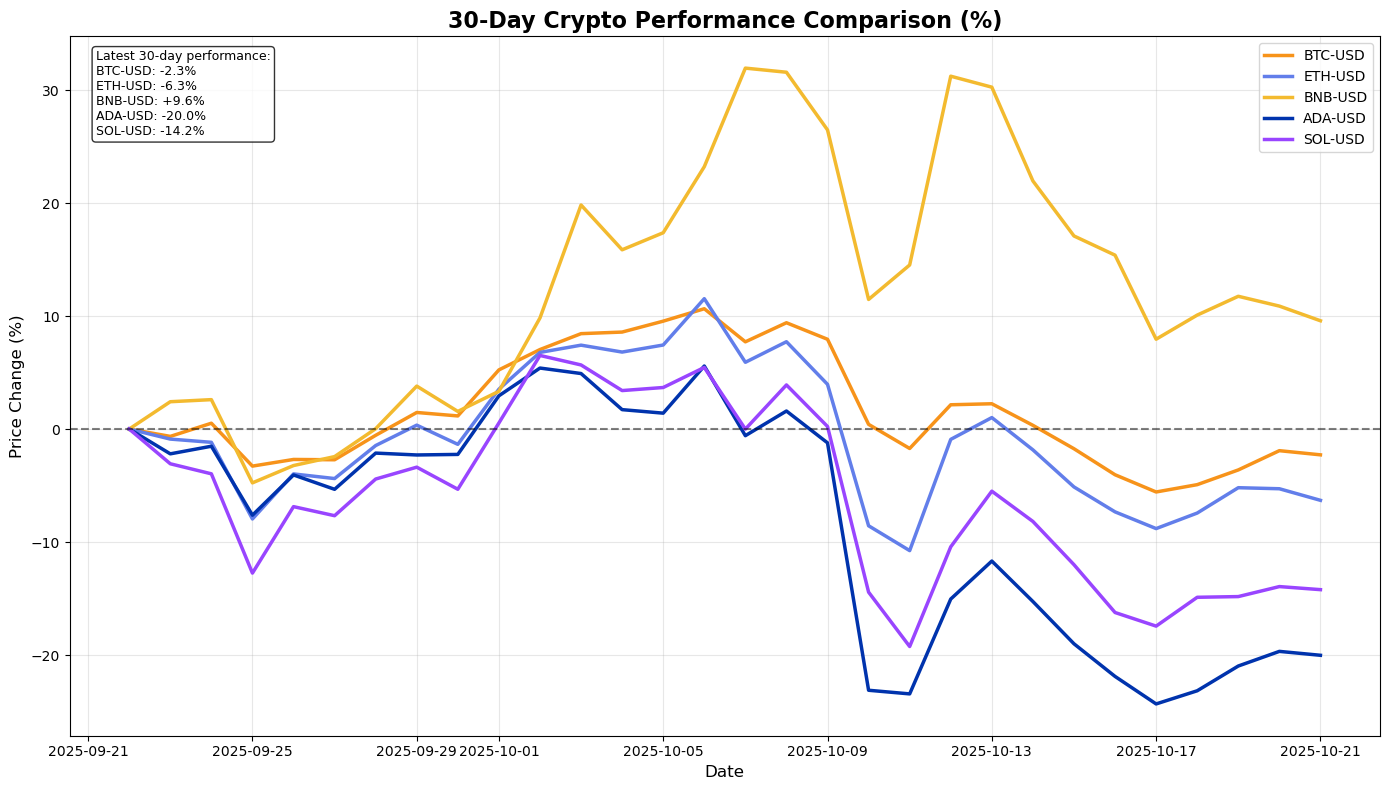

📈 Performance Summary (30 days):
BTC-USD: -2.3%
ETH-USD: -6.3%
BNB-USD: +9.6%
ADA-USD: -20.0%
SOL-USD: -14.2%


In [18]:
# Normalize data to see performance from a starting point of 100
df_normalized = (df / df.iloc[0] - 1) * 100

plt.figure(figsize=(14, 8))
colors = ['#f7931a', '#627eea', '#f3ba2f', '#0033ad', '#9945ff']

for i, symbol in enumerate(cryptos):
    plt.plot(df_normalized.index, df_normalized[symbol], 
             label=symbol, linewidth=2.5, color=colors[i])

plt.title('30-Day Crypto Performance Comparison (%)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price Change (%)', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Add latest performance text
latest_changes = df_normalized.iloc[-1].round(1)
textstr = 'Latest 30-day performance:\n' + '\n'.join([f'{k}: {v:+.1f}%' for k, v in latest_changes.items()])
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=9,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("📈 Performance Summary (30 days):")
for symbol, change in latest_changes.items():
    print(f"{symbol}: {change:+.1f}%")

/var/folders/9k/n95_ppx93nxcxk4cd0zqrmcm0000gn/T/ipykernel_60059/721327028.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'{volatility[i]:.0f}%', ha='center', va='bottom')


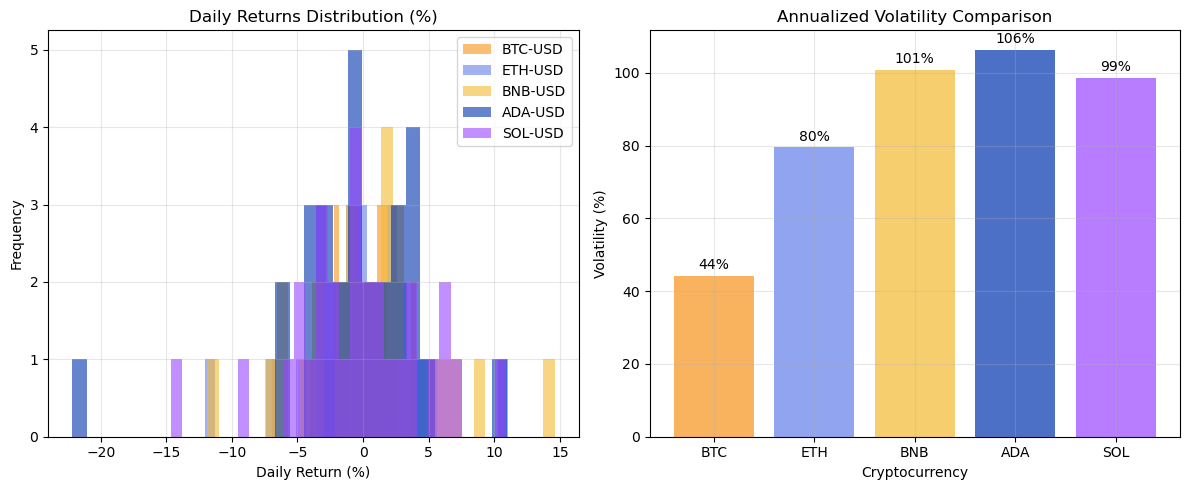

🎲 Volatility Ranking (Annualized):
1. ADA-USD: 106.3%
2. BNB-USD: 100.7%
3. SOL-USD: 98.6%
4. ETH-USD: 79.5%
5. BTC-USD: 44.2%


In [19]:
# Calculate daily returns
returns = df.pct_change().dropna()

# Calculate volatility (annualized)
volatility = returns.std() * np.sqrt(365) * 100

plt.figure(figsize=(12, 5))

# Subplot 1: Daily returns distribution
plt.subplot(1, 2, 1)
for i, symbol in enumerate(cryptos):
    plt.hist(returns[symbol] * 100, bins=30, alpha=0.6,
             label=symbol, color=colors[i])

plt.title('Daily Returns Distribution (%)')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Volatility comparison
plt.subplot(1, 2, 2)
bars = plt.bar(range(len(cryptos)), volatility, color=colors, alpha=0.7)
plt.title('Annualized Volatility Comparison')
plt.xlabel('Cryptocurrency')
plt.ylabel('Volatility (%)')
plt.xticks(range(len(cryptos)), [c.replace('-USD', '') for c in cryptos])
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{volatility[i]:.0f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("🎲 Volatility Ranking (Annualized):")
vol_sorted = volatility.sort_values(ascending=False)
for i, (symbol, vol) in enumerate(vol_sorted.items(), 1):
    print(f"{i}. {symbol}: {vol:.1f}%")

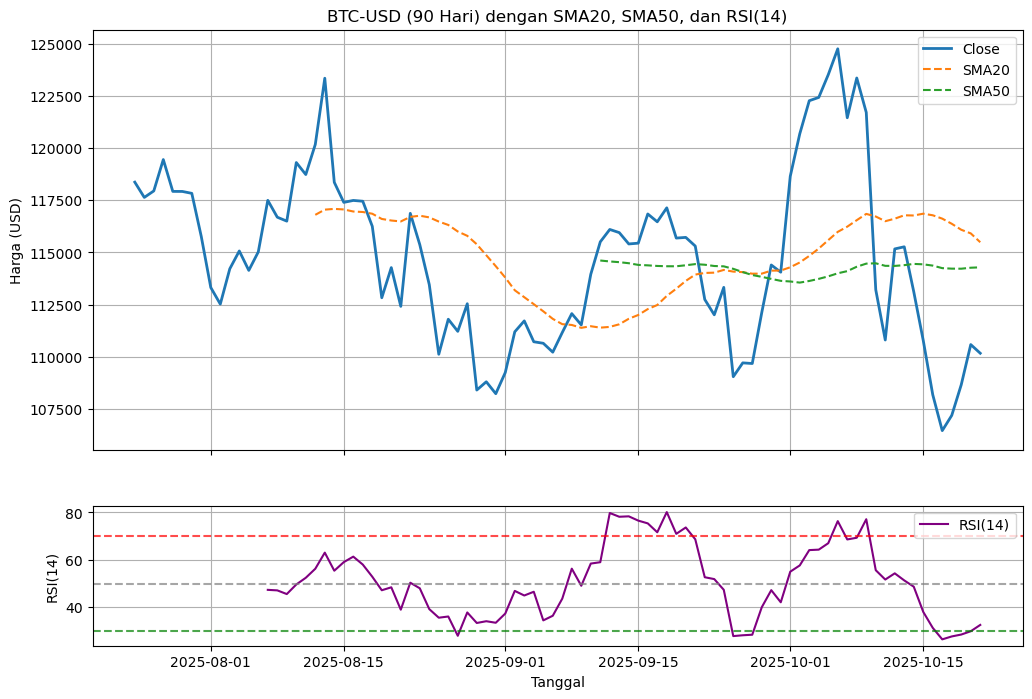

In [20]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# --- Ambil data BTC 90 hari ---
btc = yf.Ticker("BTC-USD").history(period="90d")

# --- Hitung indikator ---
# SMA20 & SMA50
btc['SMA20'] = btc['Close'].rolling(20).mean()
btc['SMA50'] = btc['Close'].rolling(50).mean()

# RSI(14)
delta = btc['Close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss.replace(0, 1e-10) # replace 0 to avoid division by zero
btc['RSI14'] = 100 - (100 / (1 + rs))

# --- Plot ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8), sharex=True, 
                              gridspec_kw={'height_ratios': [3,1]})

# Harga + SMA20 + SMA50
ax1.plot(btc.index, btc['Close'], label="Close", linewidth=2)
ax1.plot(btc.index, btc['SMA20'], label="SMA20", linestyle="--")
ax1.plot(btc.index, btc['SMA50'], label="SMA50", linestyle="--")
ax1.set_title("BTC-USD (90 Hari) dengan SMA20, SMA50, dan RSI(14)")
ax1.set_ylabel("Harga (USD)")
ax1.legend()
ax1.grid(True)

# RSI subplot
ax2.plot(btc.index, btc['RSI14'], color="purple", label="RSI(14)")
ax2.axhline(70, color="red", linestyle="--", alpha=0.7)
ax2.axhline(50, color="gray", linestyle="--", alpha=0.7)
ax2.axhline(30, color="green", linestyle="--", alpha=0.7)
ax2.set_ylabel("RSI(14)")
ax2.set_xlabel("Tanggal")
ax2.legend()
ax2.grid(True)

plt.show()


=== Strategy Summary (Last 90 Days) ===
 Symbol Total Return (90d) Max Drawdown  Trades Win Rate Last Signal RSI(Last) State
BTC-USD             +0.00%        0.00%       0     None        HOLD      43.4  CASH
ETH-USD             +0.00%        0.00%       0     None        HOLD      43.5  CASH
BNB-USD             +0.00%        0.00%       0     None        HOLD      46.5  CASH
ADA-USD             +0.00%        0.00%       0     None        HOLD      38.7  CASH
SOL-USD             +0.00%        0.00%       0     None        HOLD      41.7  CASH


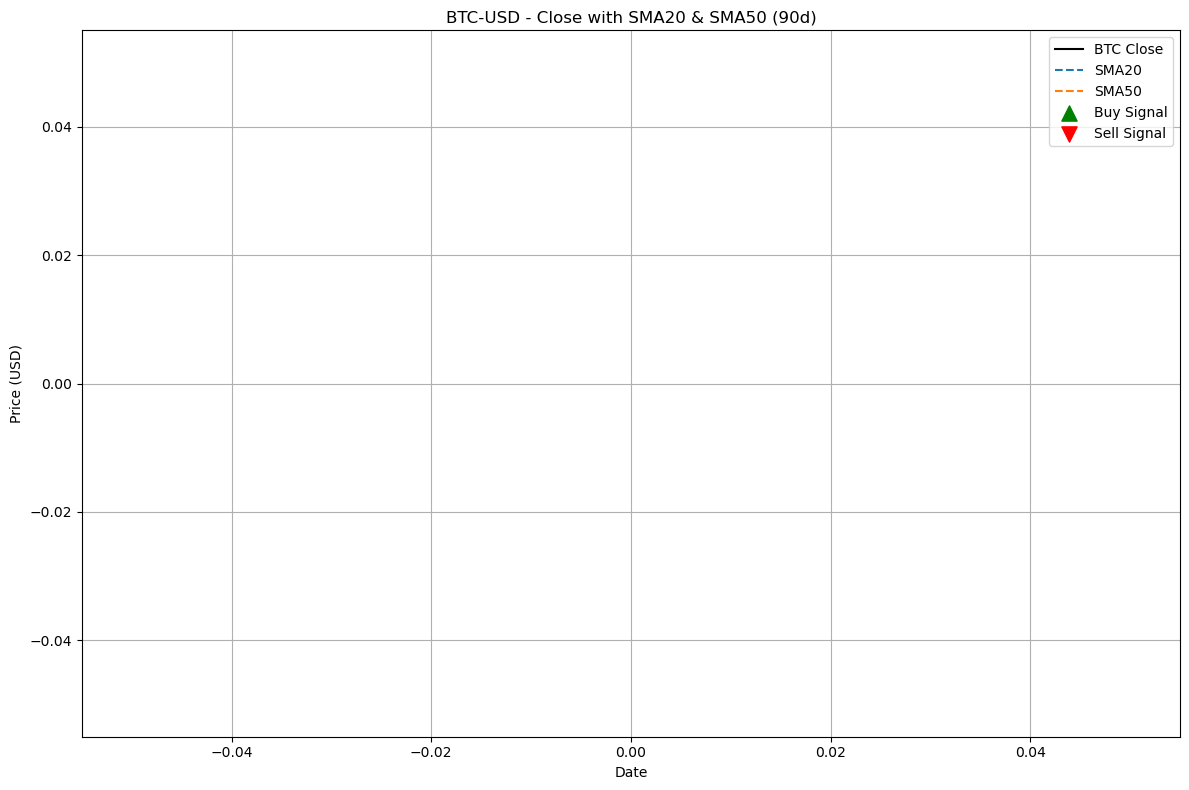

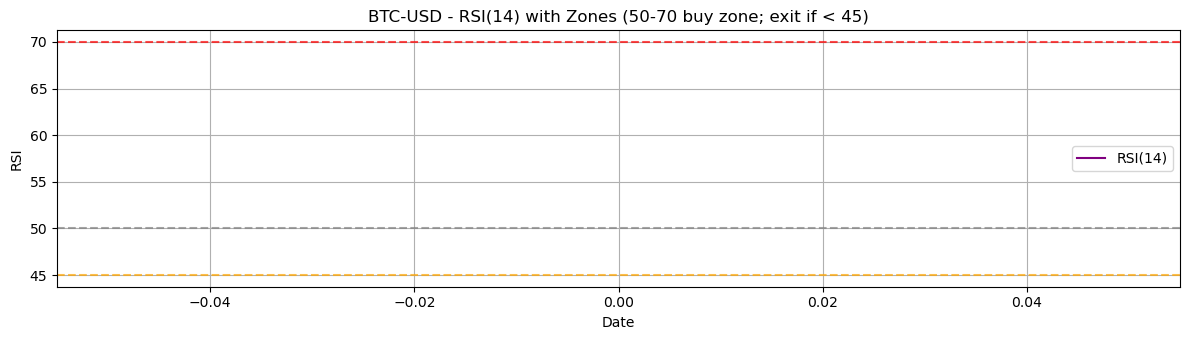

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Diasumsikan DataFrame 'df' dari kode sebelumnya sudah ada dan terisi data harga

# ==============================================================================
# FUNGSI-FUNGSI TEKNIKAL & STRATEGI
# ==============================================================================

def rsi(series, length=14):
    """Menghitung RSI menggunakan Exponential Moving Average (metode standar)."""
    delta = series.diff()
    gain = np.where(delta > 0, delta, 0.0)
    loss = np.where(delta < 0, -delta, 0.0)
    
    # Gunakan ewm (Exponential Moving Average) untuk avg_gain dan avg_loss
    gain_ema = pd.Series(gain, index=series.index).ewm(alpha=1/length, adjust=False).mean()
    loss_ema = pd.Series(loss, index=series.index).ewm(alpha=1/length, adjust=False).mean()
    
    rs = gain_ema / (loss_ema.replace(0, np.nan)) # ganti 0 dengan NaN untuk menghindari error
    rsi_val = 100 - (100 / (1 + rs))
    return rsi_val.fillna(50) # Isi nilai awal dengan 50 (netral)

def build_signals(price: pd.Series) -> pd.DataFrame:
    """Membangun semua indikator teknikal dan sinyal trading untuk satu aset."""
    out = pd.DataFrame(index=price.index)
    out['Close'] = price
    out['SMA20'] = price.rolling(20).mean()
    out['SMA50'] = price.rolling(50).mean()
    out['RSI14'] = rsi(price, 14)

    # --- Filters ---
    trend_ok = (out['Close'] > out['SMA20']) & (out['SMA20'] > out['SMA50'])
    rsi_buy_zone = (out['RSI14'] >= 50) & (out['RSI14'] <= 70)
    buy_cond = trend_ok & rsi_buy_zone
    
    exit_cond = (out['Close'] < out['SMA20']) | (out['RSI14'] < 45)

    # --- Position Logic (1=in market, 0=cash) ---
    pos = []
    holding = 0
    for i in range(len(out)):
        if pd.isna(out['SMA50'].iloc[i]): # Jangan trading jika SMA50 belum terbentuk
            pos.append(0)
            continue
            
        if holding == 0 and buy_cond.iloc[i]:
            holding = 1
        elif holding == 1 and exit_cond.iloc[i]:
            holding = 0
        pos.append(holding)
    out['Position'] = pd.Series(pos, index=out.index, dtype=int)
    
    # --- Trade markers (untuk plotting/laporan) ---
    out['BuySignal'] = (out['Position'].diff() == 1)
    out['SellSignal'] = (out['Position'].diff() == -1)
    
    # --- Strategy returns ---
    ret = out['Close'].pct_change().fillna(0)
    out['StratRet'] = ret * out['Position'].shift(1).fillna(0)
    
    # --- Performance metrics ---
    equity = (1 + out['StratRet']).cumprod()
    peak = equity.cummax()
    out['Drawdown'] = equity / peak - 1.0
    
    return out

def summarize(df_tech: pd.DataFrame, symbol: str) -> dict:
    """Merangkum performa strategi untuk satu aset."""
    s = df_tech
    # --- Trades ---
    buys = s.index[s['BuySignal']]
    sells = s.index[s['SellSignal']]
    
    # --- Pasangkan trade untuk menghitung win-rate ---
    wins = 0; losses = 0
    if len(buys) > 0:
        entry_px = None
        bi = 0
        while bi < len(buys):
            entry_time = buys[bi]
            entry_px = s.loc[entry_time, 'Close']
            
            future_sells = sells[sells > entry_time]
            if len(future_sells) == 0:
                break
            
            exit_time = future_sells[0]
            exit_px = s.loc[exit_time, 'Close']
            if exit_px > entry_px:
                wins += 1
            else:
                losses += 1
            
            bi += 1
            sells = sells[sells > exit_time]

    total_ret = (1 + s['StratRet']).prod() - 1
    max_dd = s['Drawdown'].min()
    last = s.iloc[-1]
    
    state = "IN POSITION" if last['Position'] == 1 else "CASH"
    last_sig = "BUY" if last['BuySignal'] else ("SELL" if last['SellSignal'] else "HOLD")
    winrate = (wins / (wins + losses) * 100) if (wins + losses) > 0 else np.nan
    
    return {
        'Symbol': symbol,
        'Total Return (90d)': f"{total_ret:+.2%}",
        'Max Drawdown': f"{max_dd:.2%}",
        'Trades': int(wins + losses),
        'Win Rate': (None if np.isnan(winrate) else f"{winrate:.1f}%"),
        'Last Signal': last_sig,
        'RSI(Last)': f"{last['RSI14']:.1f}",
        'State': state
    }

# ==============================================================================
# EKSEKUSI UTAMA & PLOTTING
# ==============================================================================

# --- Jalankan untuk semua koin ---
tech = {}      # menampung dataframe teknikal per simbol
summaries = [] # menampung ringkasan performa per simbol

for symbol in df.columns:
    tech[symbol] = build_signals(df[symbol].dropna())
    summaries.append(summarize(tech[symbol], symbol))

summary_df = pd.DataFrame(summaries)
print("\n=== Strategy Summary (Last 90 Days) ===")
print(summary_df.to_string(index=False))


# --- Plot BTC: Harga + SMAs ---
btc = tech['BTC-USD'].dropna()

plt.figure(figsize=(12, 8))
plt.plot(btc.index, btc['Close'], label='BTC Close', color='black', linewidth=1.5)
plt.plot(btc.index, btc['SMA20'], label='SMA20', linestyle='--')
plt.plot(btc.index, btc['SMA50'], label='SMA50', linestyle='--')

# Tandai sinyal beli/jual
plt.scatter(btc.index[btc['BuySignal']], btc['Close'][btc['BuySignal']], marker='^', s=120, color='green', label='Buy Signal', zorder=5)
plt.scatter(btc.index[btc['SellSignal']], btc['Close'][btc['SellSignal']], marker='v', s=120, color='red', label='Sell Signal', zorder=5)

plt.title('BTC-USD - Close with SMA20 & SMA50 (90d)')
plt.xlabel('Date'); plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# --- Plot BTC: RSI ---
plt.figure(figsize=(12, 3.5))
plt.plot(btc.index, btc['RSI14'], label='RSI(14)', color='purple')
# Garis panduan horizontal untuk zona
plt.axhline(70, linestyle='--', color='red', alpha=0.7)
plt.axhline(50, linestyle='--', color='gray', alpha=0.7)
plt.axhline(45, linestyle='--', color='orange', alpha=0.7)

plt.title('BTC-USD - RSI(14) with Zones (50-70 buy zone; exit if < 45)')
plt.xlabel('Date'); plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()